# **Assignment I** <br/> *Answers to all coding question*

---

In [28]:
import matplotlib.pyplot as plt
import numpy as np

from binomial_tree import *
from black_scholes import * 

## **Part I** <br/> Theory: *derivatives and no-arbitrage*

---

### **Question 1.4**

Draw the pay-off diagrams for both portfolios, showing the profit at maturity as a function of $S_T$. Explain the figures.

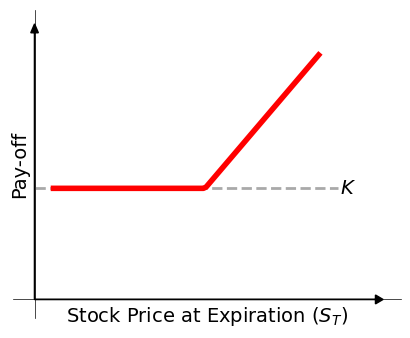

In [29]:
# parameters
K = 45  # Strike price
r = 0  # Risk-free rate
T = 1  # Time to maturity in years
S = np.linspace(5, 75, 100)  # Stock price at expiration

# Portfolio (as 1 & 2 are the same, plot only one)
call_payoff = np.maximum(S - K, 0)  # Call option pay-off
investment_payoff = K * np.exp(-r * T)  # Present value of K invested in the money-market
portfolio_1_payoff = call_payoff + investment_payoff - 20

# Plot
plt.figure(figsize=(5, 4))
plt.plot(S, portfolio_1_payoff, linewidth=4, label='Portfolio 1 & 2', zorder=3, color='red')
plt.xlabel('Stock Price at Expiration ($S_T$)', fontsize=14)
plt.ylabel('Pay-off', fontsize=14)
plt.xticks([])
plt.yticks([])

# Turning the axes into arrows
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.arrow(0, 0, 0, 60, head_width=2, head_length=2, fc='k', ec='k')
plt.arrow(0, 0, 90, 0, head_width=2, head_length=2, fc='k', ec='k')

# K
plt.plot([0, 80], [25, 25], '--', linewidth=2, color='darkgrey')
plt.text(85, 25, "$K$", ha='right', va='center', fontsize=14)

plt.show()

## **Part II** <br/> Binomial Tree: *option valuation*

---

Consider a European call option on a non-dividend-paying stock with: 

| Parameter | Value |
|-----------|-------|
| Maturity ($T$) | 1y | 
| Strike price ($K$) | $99 |
| Interest rate ($r$) | 6% |
| Current stock price ($S_t$) | $100 |
| Volatility ($\sigma$) | 20% |

---

### **Question 2.1**

Write a binomial tree program to approximate the price of the option. Construct a tree with *50 steps* and explicitly state your option price approximation.

In [30]:
# parameters
T = 1
K = 99
r = 0.06
S_0 = 100
sigma = 0.2
N = 50

In [31]:
# binomial tree (50 steps)
binom_tree = BinomialTreeValuation(
    S = S_0, 
    vol = sigma, 
    T = T,
    N = N
)

In [32]:
# option price approximation
value_EU_call = binom_tree.value_option(
    r = r,
    K = K, 
    call_put = 'Call',
    option_type = 'EU'
)
print(f"Approximate European Call Price: ${value_EU_call:.2f}")

Approximate European Call Price: $11.55


---

### **Question 2.2**

Investigate how your binomial tree estimate compares to the analytical Black-Scholes value of the option. Do experiments for different values of the volatility.

In [33]:
# new parameters
sigmas = np.linspace(0.01, 1, 100)

binom_ests = []
bs_ests = []

In [34]:
# loop through sigmas and estimate approximation error
for sigma in sigmas:

    # binomial tree
    binom_tree = BinomialTreeValuation(S=S_0, vol=sigma, T = T, N=N)
    value_EU_call = binom_tree.value_option(r=r, K=K, call_put='Call', option_type='EU')
    binom_ests.append(value_EU_call)

    # black-scholes
    value_EU_call_bs = value_option_black_scholes(S_t=S_0, K=K, r=r, vol=sigma, tau=T)
    bs_ests.append(value_EU_call_bs)

differences = np.abs(np.array(binom_ests) - np.array(bs_ests))

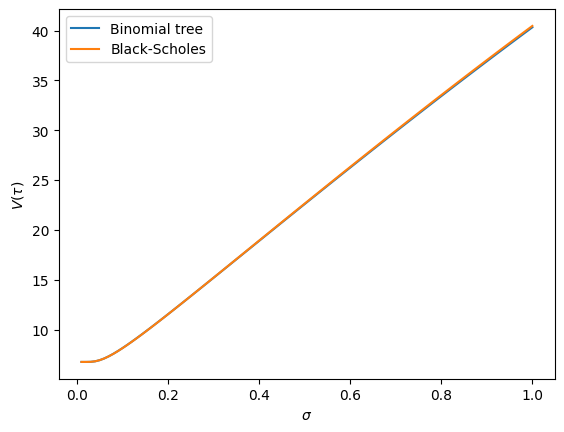

In [35]:
# plot results
plt.plot(sigmas, binom_ests, label='Binomial tree')
plt.plot(sigmas, bs_ests, label='Black-Scholes')
plt.xlabel('$\\sigma$')
plt.ylabel('$V(\\tau)$')
plt.legend()
plt.show()

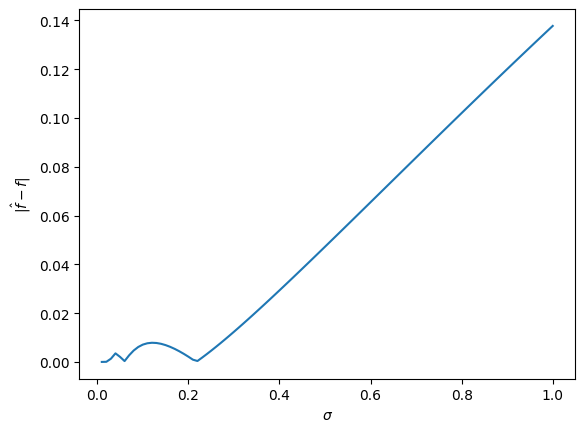

In [36]:
# plot the differences
plt.plot(sigmas, differences)
plt.xlabel('$\\sigma$')
plt.ylabel('$|\\hat{f}-f|$')
plt.show()

---

### **Question 2.3**
Study the convergence of the method for increasing number of steps in the tree. What is the computational complexity of this algorithm as a function of the number of steps in the tree?

In [37]:
# new parameters
Ns = np.arange(1, 101)

binom_ests = []
bs_ests = []

In [38]:
# loop through number of steps and estimate approximation error
for N in Ns:
    
    # binomial tree
    binom_tree = BinomialTreeValuation(S=S_0, vol=sigma, T=T, N=N)
    value_EU_call = binom_tree.value_option(r=r, K=K, call_put='Call', option_type='EU')
    binom_ests.append(value_EU_call)

    # black-scholes
    value_EU_call_bs = value_option_black_scholes(S_t=S_0, K=K, r=r, vol=sigma, tau=T)
    bs_ests.append(value_EU_call_bs)

differences = np.abs(np.array(binom_ests) - np.array(bs_ests))

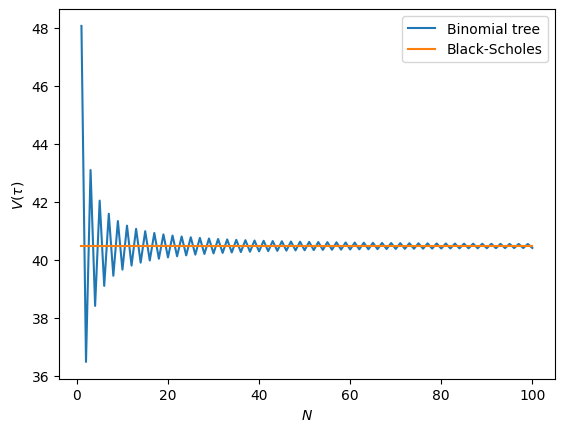

In [39]:
# plot results
plt.plot(Ns, binom_ests, label='Binomial tree')
plt.plot(Ns, bs_ests, label='Black-Scholes')
plt.xlabel('$N$')
plt.ylabel('$V(\\tau)$')
plt.legend()
plt.show()

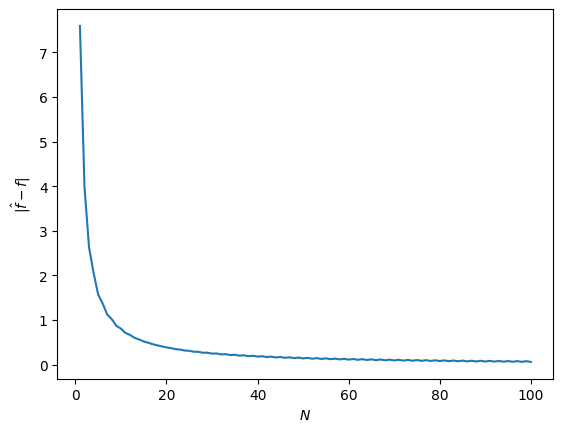

In [40]:
# plot the differences
plt.plot(Ns, differences)
plt.xlabel('$N$')
plt.ylabel('$|\\hat{f}-f|$')
plt.show()

---

### **Question 2.4**
Compute the hedge parameter $\triangle$ from the binomial tree model at $t = 0$. Compare with the analytical Black-Scholes delta $\triangle_0 = N(d1)$. Experiment for different values of the volatility.

In [41]:
# new parameters
sigmas = np.arange(0.10, 1.10, 0.10)

binom_deltas = []
bs_deltas = []

In [42]:
# loop through sigmas to estimate hedge parameter and compare to black-scholes
for sigma in sigmas:
    
    binom_tree = BinomialTreeValuation(S=S_0, vol=sigma, T=T, N=N)
    payoff_tree, u, d = binom_tree.value_option(r=r, K=K, call_put='Call', option_type='EU', as_tree=True)  # returns the payoff tree
    
    # up and down payoffs after one step
    f_u = payoff_tree[1][1]
    f_d = payoff_tree[1][0]

    # hedge parameter (binomial tree)    
    binom_delta = hedge_parameter_binomial(fu=f_u, fd=f_d, S_0=S, u=u, d=d)
    binom_deltas.append(binom_delta)
    
    # hedge parameter (black-scholes)
    bs_delta = hedge_parameter_black_scholes(S_t=S, K=K, r=r, vol=sigma, tau=T)
    bs_deltas.append(bs_delta)
    
differences = np.abs(np.array(binom_deltas) - np.array(bs_deltas))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


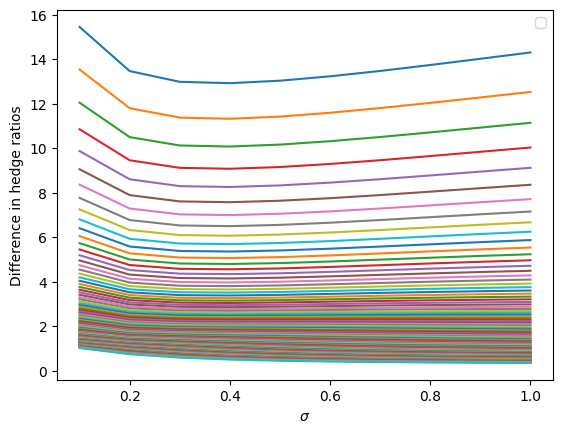

In [43]:
plt.plot(sigmas, differences)
plt.ylabel("Difference in hedge ratios")
plt.xlabel("$\\sigma$")
plt.legend()

---

### **Question 2.5**

Now suppose that the option is American. What is the value of the American put and call for the corresponding parameters?

In [44]:
# new parameters
sigma = 0.2

In [45]:
# set up the binomial tree
binom_tree = BinomialTreeValuation(S=S_0, vol=sigma, T=T, N=N)

In [46]:
# call price approximations
value_call_US = binom_tree.value_option(r=r, K=K, call_put='Call', option_type='US')
print(f"Approximate American Call Price: ${value_call_US:.2f}")

value_call_EU = binom_tree.value_option(r=r, K=K, call_put='Call', option_type='EU')
print(f"Approximate European Call Price: ${value_call_EU:.2f}")

Approximate American Call Price: $11.55
Approximate European Call Price: $11.55


In [47]:
# put price approximations
value_put_US = binom_tree.value_option(r=r, K=K, call_put='Put', option_type='US')
print(f"Approximate American Put Price: ${value_put_US:.2f}")

value_put_EU = binom_tree.value_option(r=r, K=K, call_put='Put', option_type='EU')
print(f"Approximate European Put Price: ${value_put_EU:.2f}")

Approximate American Put Price: $5.35
Approximate European Put Price: $4.79


Experiment for different values of the volatility.

In [48]:
# new parameters
sigmas = np.linspace(0.01, 1, 100)

values_call_US = []
values_call_EU = []

values_put_US = []
values_put_EU = []        

In [49]:
# loop through sigmas to estimate approximation error
for sigma in sigmas:
    # set up the binomial tree
    binom_tree = BinomialTreeValuation(S=S_0, vol=sigma, T=T, N=N)
    
    # call price approximations
    value_call_US = binom_tree.value_option(r=r, K=K, call_put='Call', option_type='US')
    value_call_EU = binom_tree.value_option(r=r, K=K, call_put='Call', option_type='EU')

    # put price approximations
    value_put_US = binom_tree.value_option(r=r, K=K, call_put='Put', option_type='US')
    value_put_EU = binom_tree.value_option(r=r, K=K, call_put='Put', option_type='EU')

    # add to lists
    values_call_US.append(value_call_US)
    values_call_EU.append(value_call_EU)
    values_put_US.append(value_put_US)
    values_put_EU.append(value_put_EU)

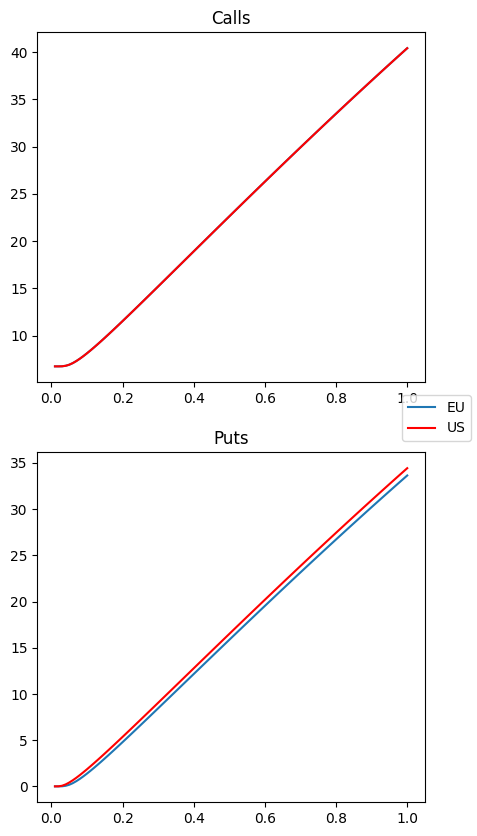

In [50]:
fig, axs = plt.subplots(2, 1, figsize=(5, 10))

axs[0].set_title('Calls') 
axs[0].plot(sigmas, values_call_EU, label='EU') 
axs[0].plot(sigmas, values_call_US, label='US', color = 'red') 

axs[1].set_title('Puts') 
axs[1].plot(sigmas, values_put_EU)
axs[1].plot(sigmas, values_put_US, color = 'red')
fig.legend(loc='center right')


---

## **Part III** <br/> Black-Scholes: *hedging simulations*

---

### **Question 3.3**

Use the Euler method to perform a hedging simulation. Do an experiment where the volatility in the stock price process is matching the volatility used in the delta computation (set both equal to 20%).

In [51]:
# run the hedge simulations
profits_losses = run_hedge_simulations(
    n_simulations = 1000,
    S_0 = 100,
    K = 99,
    r = 0.06,
    stock_volatility = 0.2,
    delta_volatility = 0.2,
    T = 1,
    N = 1000,
    n_hedges = 53
)
print(f"Mean profit/loss at t=T is {np.mean(profits_losses):.2f}")

Mean profit/loss at t=T is 0.01


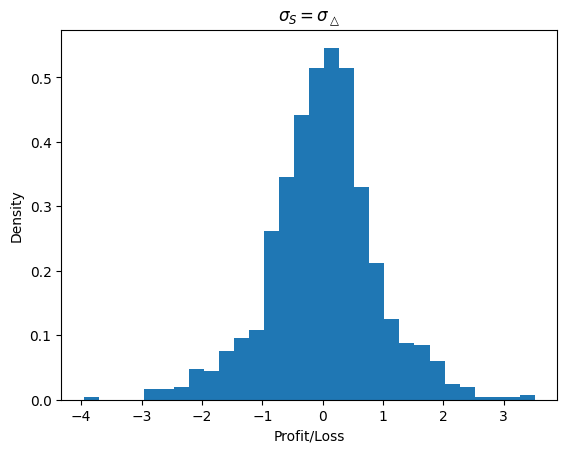

In [52]:
# plot the results
plt.hist(profits_losses, bins=30, density=True)
plt.xlabel('Profit/Loss')
plt.ylabel('Density')
plt.title('${\\sigma}_{S} = {\\sigma}_{\\triangle}$')
plt.show()

Vary the frequency of the hedge adjustment (from daily to weekly) and explain the results.

Perform numerical experiments where the volatility in the stock price process is not matching the volatility used in the delta valuation. Experiment for various levels and explain the results.

---